### 🗣️  Introduction to NLP in the Racing Context

- Analyzing this text with Natural Language Processing (NLP) can help uncover sentiment, emotional tone, or strategic insights that correlate with performance outcomes (like lap time drops, pit stop decisions, or DNFs)

#### ✅ 1. Preprocessing Text with NLTK or SpaCy

In [1]:
driver_comment = "The car felt amazing today, grip levels were perfect in Sector 3!"

In [ ]:
! pip install spacy
! python -m spacy download en_core_web_sm

⚙️ Preprocessing with SpaCy

In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")  # Make sure it's installed: `python -m spacy download en_core_web_sm`

doc = nlp(driver_comment)
filtered = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
print(filtered)


['car', 'feel', 'amazing', 'today', 'grip', 'level', 'perfect', 'Sector', '3']


✅ Why preprocess?
Cleans text for consistent and meaningful analysis (especially before sentiment or classification).

#### 2. Running Sentiment Analysis with TextBlob

TextBlob is a simple but effective NLP tool for quick sentiment analysis.

In [10]:
from textblob import TextBlob

comment = "The strategy today was a disaster. I had no grip at all!"

blob = TextBlob(comment)
print("Sentiment polarity:", blob.sentiment.polarity)  # -1 to +1
print("Sentiment subjectivity:", blob.sentiment.subjectivity)  # 0 to 1


Sentiment polarity: 0.0
Sentiment subjectivity: 0.0


#### 3. Linking Sentiment Trends to Race Outcomes

If you have multiple comments per race or per driver, you can:



In [18]:
# Load required packages
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\p.muthusenapathy\VSCode_Projects\Python_Training\datasets\F1 data.csv")
# Use double backslashes or raw string for Windows file paths to avoid unicode errors

# Add sentiment scores to the data:
# Add sentiment scores to the data, handling NaN values:
df['sentiment'] = df['Driver_Comments'].apply(lambda x: TextBlob(x if isinstance(x, str) else "").sentiment.polarity)

#Group and Analyze:
# Compare average sentiment with average lap time
sentiment_vs_lap = df.groupby("Driver's forename")[['sentiment', 'milliseconds']].mean()
print(sentiment_vs_lap.sort_values('sentiment'))


                   sentiment  milliseconds
Driver's forename                         
Anthony            -0.006481  9.889645e+06
Felipe             -0.000795  5.852220e+06
Willi               0.000000           NaN
StÃ©phane           0.000000           NaN
Syd                 0.000000           NaN
...                      ...           ...
Heikki              0.001091  5.855633e+06
Robert              0.001684  5.946452e+06
Kimi                0.002557  5.659059e+06
Jenson              0.002589  5.844176e+06
Lewis               0.002778  5.821132e+06

[473 rows x 2 columns]


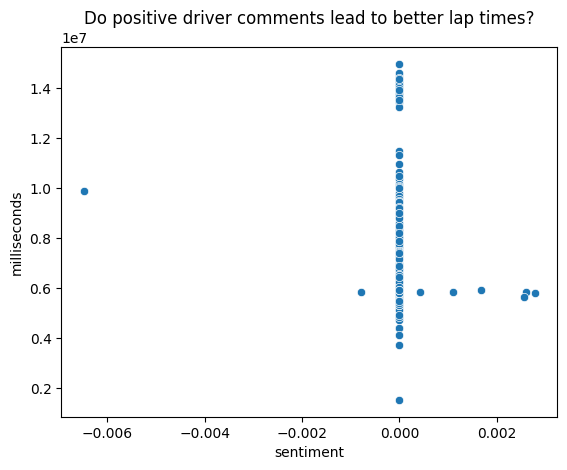

In [ ]:
#Plotting the results
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=sentiment_vs_lap, x='sentiment', y='milliseconds')
plt.title("Do positive driver comments lead to better lap times?")
plt.show()